<a href="https://colab.research.google.com/github/ganpath21/machine-learning-using-tensorflow/blob/master/ElasticNet_regularization_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
from sklearn import datasets as skds
from sklearn import preprocessing as skpp
boston = skds.load_boston()
print(boston.DESCR)
x = boston.data.astype(np.float32)
y = boston.target.astype(np.float32)
if(y.ndim == 1):
  y = y.reshape(len(y), 1)
x = skpp.StandardScaler().fit_transform(x)

In [0]:
from sklearn import model_selection as skms
x_train, x_test, y_train, y_test = skms.train_test_split(x, y, test_size=0.4, random_state = 123)
print(x_train.shape)

In [0]:
num_inputs = x_train.shape[1]
num_outputs = y_train.shape[1]
x_tensor = tf.placeholder(dtype=tf.float32,shape=[None, num_inputs], name='x')
y_tensor = tf.placeholder(dtype=tf.float32,shape=[None, num_outputs], name='y')

w = tf.Variable(tf.zeros([num_inputs, num_outputs]),dtype=tf.float32, name='w')
b = tf.Variable(tf.zeros([num_outputs]),dtype=tf.float32, name='b')

model = tf.matmul(x_tensor, w) + b

In [0]:
ridge_param = tf.Variable(0.8, dtype=tf.float32)
lasso_param = tf.Variable(0.8, dtype=tf.float32)

ridge_loss = tf.reduce_mean(tf.square(w)) * ridge_param
lasso_loss = tf.reduce_mean(tf.abs(w)) * lasso_param

loss = tf.reduce_mean(tf.square(model - y_tensor)) + ridge_loss + lasso_loss

In [5]:
learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
#mse and R2 functions
mse = tf.reduce_mean(tf.square(model - y_tensor))
y_mean = tf.reduce_mean(y_tensor)
total_error = tf.reduce_sum(tf.square(y_tensor - y_mean))
unexplained_error = tf.reduce_sum(tf.square(y_tensor - model))
rs = 1 - tf.div(unexplained_error, total_error)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [6]:
num_epochs = 1500
loss_epochs = np.empty(shape=[num_epochs],dtype=np.float32)
mse_epochs = np.empty(shape=[num_epochs],dtype=np.float32)
rs_epochs = np.empty(shape=[num_epochs],dtype=np.float32)

mse_score = 0.0
rs_score = 0.0

with tf.Session() as tfs:
  tfs.run(tf.global_variables_initializer())
  for epoch in range(num_epochs):
    feed_dict = {x_tensor: x_train, y_tensor: y_train}
    loss_val,_ = tfs.run([loss, optimizer], feed_dict)
    loss_epochs[epoch] = loss_val

    feed_dict = {x_tensor: x_test, y_tensor: y_test }
    mse_score, rs_score = tfs.run([mse,rs], feed_dict)
    mse_epochs[epoch] = mse_score
    rs_epochs[epoch] = rs_score

print('For test data : MSE = {0:.8f}, R2 = {1:.8f} '.format(mse_score, rs_score))

For test data : MSE = 30.65101814, R2 = 0.63977152 


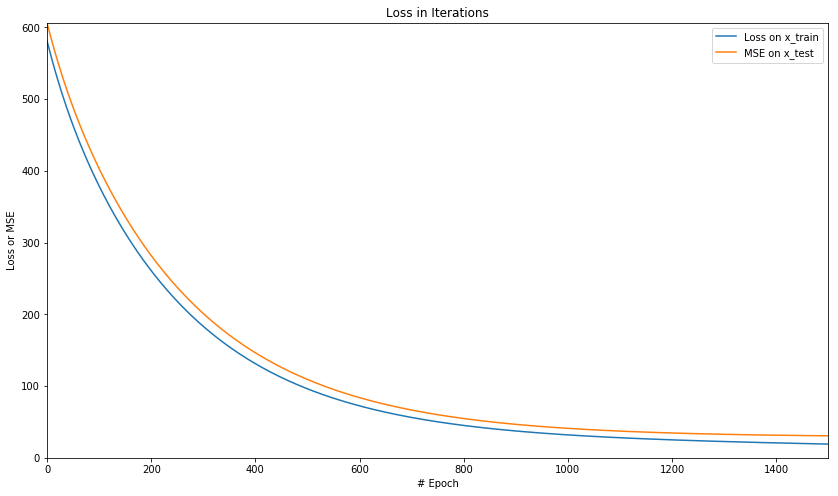

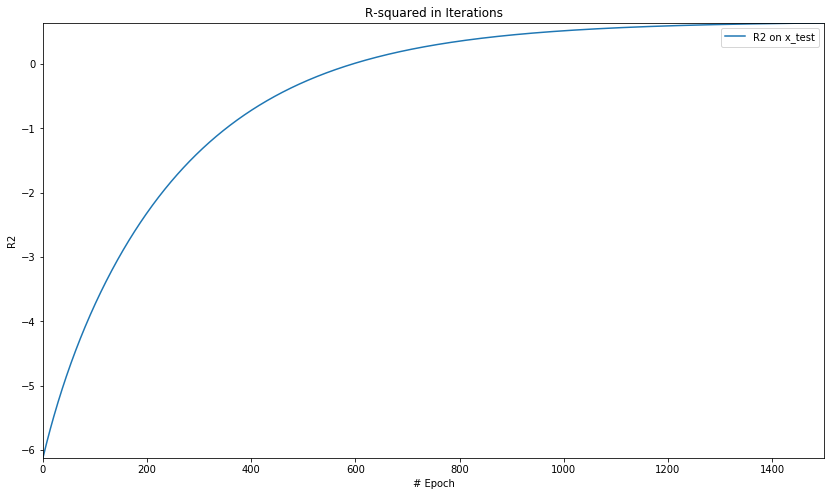

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))

plt.axis([0,num_epochs, 0, np.max([loss_epochs,mse_epochs]) ])
plt.plot(loss_epochs, label='Loss on x_train')
plt.plot(mse_epochs, label='MSE on x_test')
plt.title('Loss in Iterations')
plt.xlabel('# Epoch')
plt.ylabel('Loss or MSE')
plt.legend()

plt.show()

plt.figure(figsize=(14,8))

plt.axis([0,num_epochs, np.min(rs_epochs), np.max(rs_epochs) ])
plt.title('R-squared in Iterations')
plt.plot(rs_epochs, label='R2 on x_test')
plt.xlabel('# Epoch')
plt.ylabel('R2')
plt.legend()

plt.show()